<a href="https://colab.research.google.com/github/Diandra2607/Advertising/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


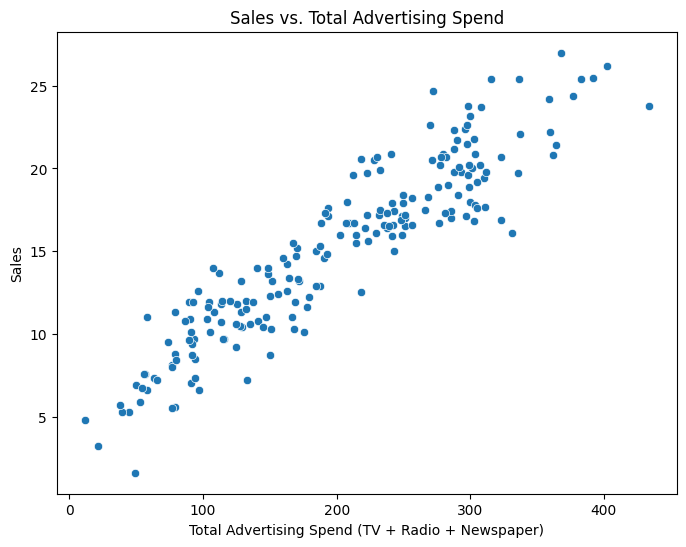

In [ ]:
df['Total_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']

# Create the scatter plot with 'Total_Spend' on the x-axis and 'Sales' on the y-axis.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Spend', y='Sales', data=df)
plt.xlabel('Total Advertising Spend (TV + Radio + Newspaper)')
plt.ylabel('Sales')
plt.title('Sales vs. Total Advertising Spend')
plt.show()

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['TV','Radio','Newspaper']]
Y = df[['Sales']]

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
Y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print('coef= ', model.coef_)
print('intercept= ', model.intercept_)

coef=  [[0.05450927 0.10094536 0.00433665]]
intercept=  [4.7141264]


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[17.0347724 ]
 [20.40974033]
 [23.72398873]
 [ 9.27278518]
 [21.68271879]
 [12.56940161]
 [21.08119452]
 [ 8.69035045]
 [17.23701254]
 [16.66657475]
 [ 8.92396497]
 [ 8.4817344 ]
 [18.2075123 ]
 [ 8.06750728]
 [12.64550975]
 [14.93162809]
 [ 8.12814594]
 [17.89876565]
 [11.00880637]
 [20.47832788]
 [20.80631846]
 [12.59883297]
 [10.9051829 ]
 [22.38854775]
 [ 9.41796094]
 [ 7.92506736]
 [20.83908497]
 [13.81520938]
 [10.77080925]
 [ 7.92682509]
 [15.95947357]
 [10.63490851]
 [20.80292008]
 [10.43434164]
 [21.5784752 ]
 [21.18364487]
 [12.12821771]
 [22.80953262]
 [12.60992766]
 [ 6.46441252]]


In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2.9077569102710896
Mean Absolute Error: 1.2748262109549338
Root Mean Squared Error: 1.7052146229349223


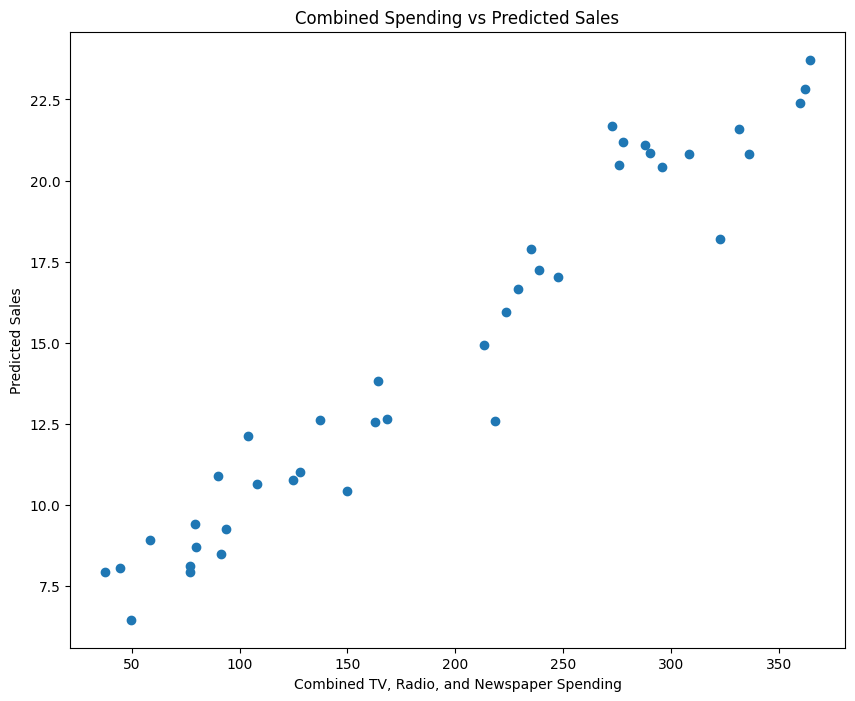

In [ ]:
X_test['Combined'] = X_test['TV'] + X_test['Radio'] + X_test['Newspaper']

plt.figure(figsize=(10, 8))
plt.scatter(X_test['Combined'], Y_pred) # X-axis is the combined feature, Y-axis is the predictions
plt.xlabel('Combined TV, Radio, and Newspaper Spending')
plt.ylabel('Predicted Sales')
plt.title('Combined Spending vs Predicted Sales')
plt.show()